In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
raw_data = pd.read_csv("../Processed Datasets/co2data_interpolate.csv")
raw_data.head()

,country,year,co2
0,Afghanistan,1949,0.015
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.106


In [247]:
india_data = raw_data[raw_data["country"] == "India"]
india_data

,country,year,co2
10815,India,1858,0.395
10816,India,1859,0.637
10817,India,1860,0.644
10818,India,1861,0.498
10819,India,1862,0.551
...,...,...,...
10973,India,2016,2382.223
10974,India,2017,2433.856
10975,India,2018,2599.806
10976,India,2019,2625.968


In [248]:
data = india_data.copy()
data["date"] = pd.to_datetime(data["year"], format="%Y").dt.normalize()
data.set_index(data["date"], inplace=True)
data.index

DatetimeIndex(['1858-01-01', '1859-01-01', '1860-01-01', '1861-01-01',
               '1862-01-01', '1863-01-01', '1864-01-01', '1865-01-01',
               '1866-01-01', '1867-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='date', length=163, freq=None)

In [249]:
data.head()

,country,year,co2,date
date,,,,
1858-01-01,India,1858,0.395,1858-01-01
1859-01-01,India,1859,0.637,1859-01-01
1860-01-01,India,1860,0.644,1860-01-01
1861-01-01,India,1861,0.498,1861-01-01
1862-01-01,India,1862,0.551,1862-01-01


In [250]:
cols = ["country", "year", "date"]
data.drop(cols, axis=1, inplace=True)
data.head()

,co2
date,
1858-01-01,0.395
1859-01-01,0.637
1860-01-01,0.644
1861-01-01,0.498
1862-01-01,0.551


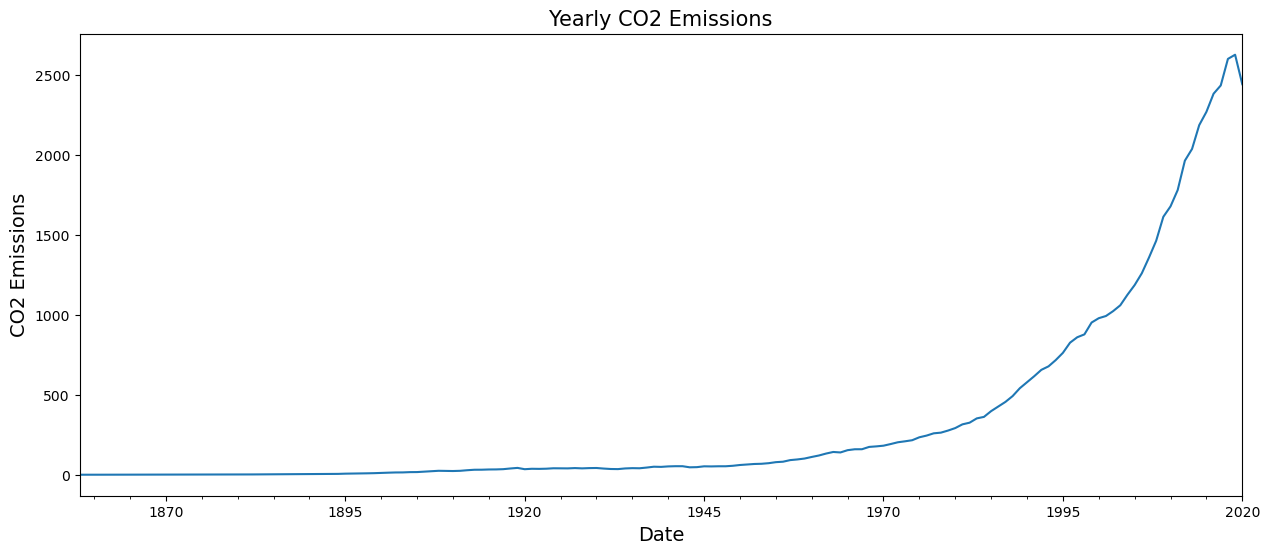

In [251]:
data.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('CO2 Emissions', fontsize = 14)
plt.title('Yearly CO2 Emissions', fontsize = 15)
plt.show()

In [252]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                   5.312519
p-value                          1.000000
No. of Lags Used                14.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


<AxesSubplot:xlabel='date'>

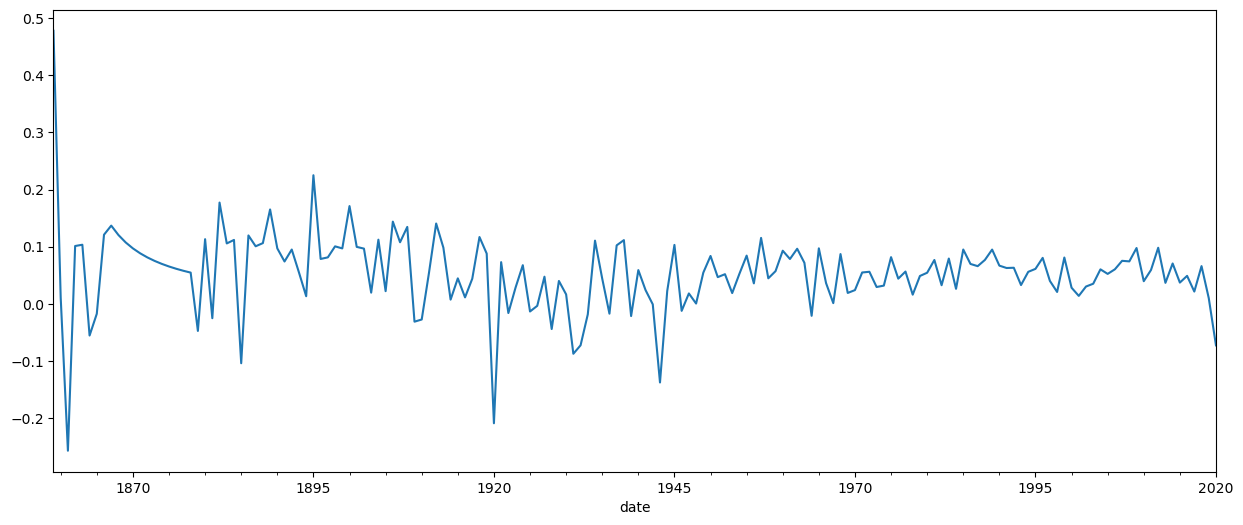

In [253]:
data["co2"] = pd.Series(np.log(data["co2"])).diff()
data.dropna(inplace=True)
data.plot(figsize = (15, 6), legend = None)

In [254]:
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -3.362820
p-value                          0.012294
No. of Lags Used                 5.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


#### Stationary data as p-value is less than 0.05

In [255]:
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]
print(train.shape)
print(test.shape)
print(test)
print(train)

(129, 1)
(33, 1)
                 co2
date                
1988-01-01  0.076807
1989-01-01  0.094897
1990-01-01  0.066801
1991-01-01  0.062656
1992-01-01  0.063086
1993-01-01  0.032812
1994-01-01  0.055938
1995-01-01  0.061144
1996-01-01  0.080391
1997-01-01  0.040071
1998-01-01  0.020735
1999-01-01  0.080999
2000-01-01  0.028148
2001-01-01  0.013839
2002-01-01  0.030234
2003-01-01  0.035141
2004-01-01  0.060295
2005-01-01  0.052345
2006-01-01  0.060362
2007-01-01  0.075216
2008-01-01  0.074238
2009-01-01  0.097620
2010-01-01  0.039554
2011-01-01  0.059151
2012-01-01  0.098086
2013-01-01  0.036675
2014-01-01  0.070560
2015-01-01  0.037141
2016-01-01  0.048886
2017-01-01  0.021443
2018-01-01  0.065960
2019-01-01  0.010013
2020-01-01 -0.072717
                 co2
date                
1859-01-01  0.477884
1860-01-01  0.010929
1861-01-01 -0.257099
1862-01-01  0.101135
1863-01-01  0.103362
...              ...
1983-01-01  0.079208
1984-01-01  0.026202
1985-01-01  0.094996
1986-01-01  0.069

In [256]:
from pmdarima.arima import auto_arima

#The default values of several important parameters for auto_arima function are as follows:
#max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

arima_model = auto_arima(train, seasonal = False, d=1, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-221.506, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-285.072, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-283.076, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-288.401, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-284.800, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-288.583, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-234.457, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-283.073, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-282.004, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-286.868, Time=0.32 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-286.519, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-260.438, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-291.273, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-280.548, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-285.655, Time=0.32 sec
 ARIMA(3,1

In [268]:
from statsmodels.tsa.arima.model import ARIMA

In [275]:
model = ARIMA(train, order = (2, 1, 1))
model_fit = model.fit()
model_fit.summary()

d:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
d:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
d:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 150.628
Date:                Mon, 05 Dec 2022   AIC                           -293.256
Time:                        10:23:58   BIC                           -281.848
Sample:                    01-01-1859   HQIC                          -288.621
                         - 01-01-1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1000      0.100     -0.995      0.320      -0.297       0.097
ar.L2         -0.3579      0.078     -4.604      0.000      -0.510      -0.206
ma.L1         -0.8590      0.069    -12.523      0.000      -0.993      -0.725
sigma2         0.0055      0.001      9.896      0.000       0.004       0.007
===================================================================================
Ljung-Box (L1) (Q):                   3.55   Jarque-Bera (JB):               159.08
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                            -1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

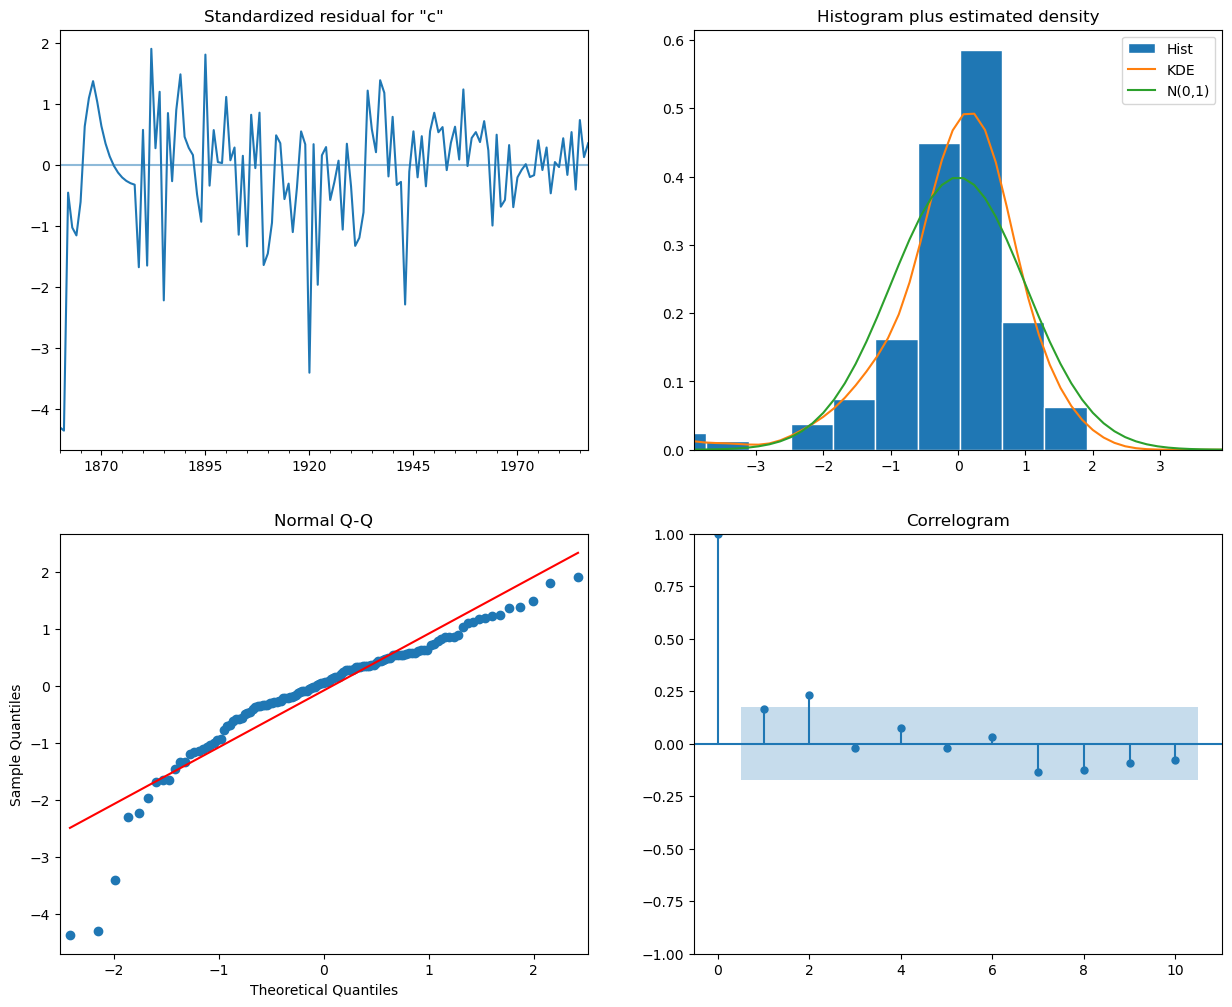

In [276]:
model_fit.plot_diagnostics(figsize = (15, 12))
plt.show()

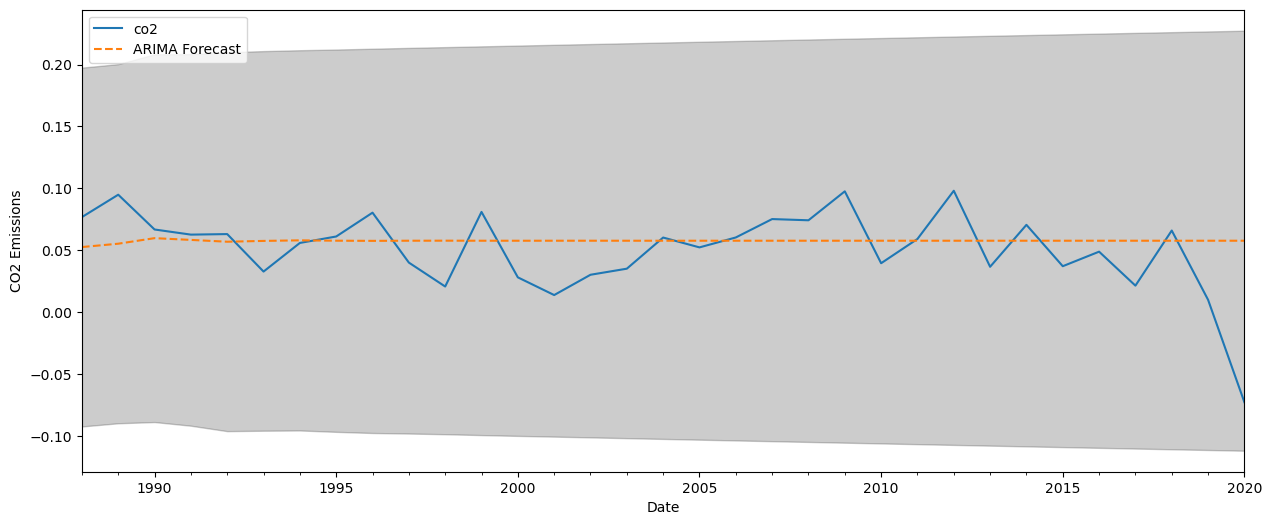

In [277]:
pred = model_fit.get_forecast(steps = len(test))
#Plotting the observed and forecasted values:
ax1 = data['1988':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('CO2 Emissions')
plt.legend(loc = 'upper left')
plt.show()